# Mount Roraima

This tepui is in the border of Brazil, Venezuela, and Guyana. Landsat scene is 232/056 from 2015/10/04. It was hard to find one with this little cloud coverage.

In [1]:
import matplotlib.pyplot as plt
import xlandsat as xls
import wallpaper

## Load the data

Use xlansat to load the L2 scene and the panchromatic band. The data were cropped to a smaller region and exported to the files we're reading below.

In [2]:
scene = xls.load_scene("../data/roraima/LC08_L2SP_232056_20151004_20200908_02_T1.tar.gz")
pan = xls.load_panchromatic("../data/roraima/LC08_L1TP_232056_20151004_20200908_02_T1.tar.gz")
scene

<xarray.Dataset>
Dimensions:   (easting: 1501, northing: 901)
Coordinates:
  * easting   (easting) float64 7.3e+05 7.3e+05 7.3e+05 ... 7.75e+05 7.75e+05
  * northing  (northing) float64 5.65e+05 5.65e+05 ... 5.92e+05 5.92e+05
Data variables:
    blue      (northing, easting) float16 0.07959 0.08118 ... 0.05579 0.05591
    green     (northing, easting) float16 0.09802 0.09888 ... 0.07178 0.07239
    red       (northing, easting) float16 0.1097 0.1111 ... 0.06042 0.06018
Attributes: (12/19)
    Conventions:                CF-1.8
    title:                      Landsat 8 scene from 2015-10-04 (path/row=232...
    digital_object_identifier:  https://doi.org/10.5066/P9OGBGM6
    origin:                     Image courtesy of the U.S. Geological Survey
    landsat_product_id:         LC08_L2SP_232056_20151004_20200908_02_T1
    processing_level:           L2SP
    ...                         ...
    ellipsoid:                  WGS84
    date_acquired:              2015-10-04
    scene_center_time:          14:16:44.7343150Z
    wrs_path:                   232
    wrs_row:                    56
    mtl_file:                   GROUP = LANDSAT_METADATA_FILE\n  GROUP = PROD...

## Process

Fill any missing data gaps by interpolation and pan-sharpen the scene.

In [3]:
scene = xls.interpolate_missing(scene)
scene = xls.pansharpen(scene, pan)
scene

<xarray.Dataset>
Dimensions:   (northing: 1801, easting: 3001)
Coordinates:
  * northing  (northing) float64 5.65e+05 5.65e+05 ... 5.92e+05 5.92e+05
  * easting   (easting) float64 7.3e+05 7.3e+05 7.3e+05 ... 7.75e+05 7.75e+05
Data variables:
    red       (northing, easting) float32 0.09329 0.1099 ... 0.04518 0.04568
    green     (northing, easting) float32 0.08333 0.09819 ... 0.05367 0.05495
    blue      (northing, easting) float32 0.06766 0.07973 ... 0.04171 0.04244
Attributes: (12/21)
    Conventions:                  CF-1.8
    title:                        Pansharpend Landsat 8 scene from 2015-10-04...
    digital_object_identifier:    https://doi.org/10.5066/P9OGBGM6
    origin:                       Image courtesy of the U.S. Geological Survey
    landsat_product_id:           LC08_L2SP_232056_20151004_20200908_02_T1
    processing_level:             L2SP
    ...                           ...
    scene_center_time:            14:16:44.7343150Z
    wrs_path:                     232
    wrs_row:                      56
    pansharpening_method:         Weighted Brovey Transform
    pansharpening_rgb_weights:    (1, 1, 0.2)
    pansharpening_band_filename:  LC08_L1TP_232056_20151004_20200908_02_T1_B8...

## Make the figure

Create a composite and make it look nice.

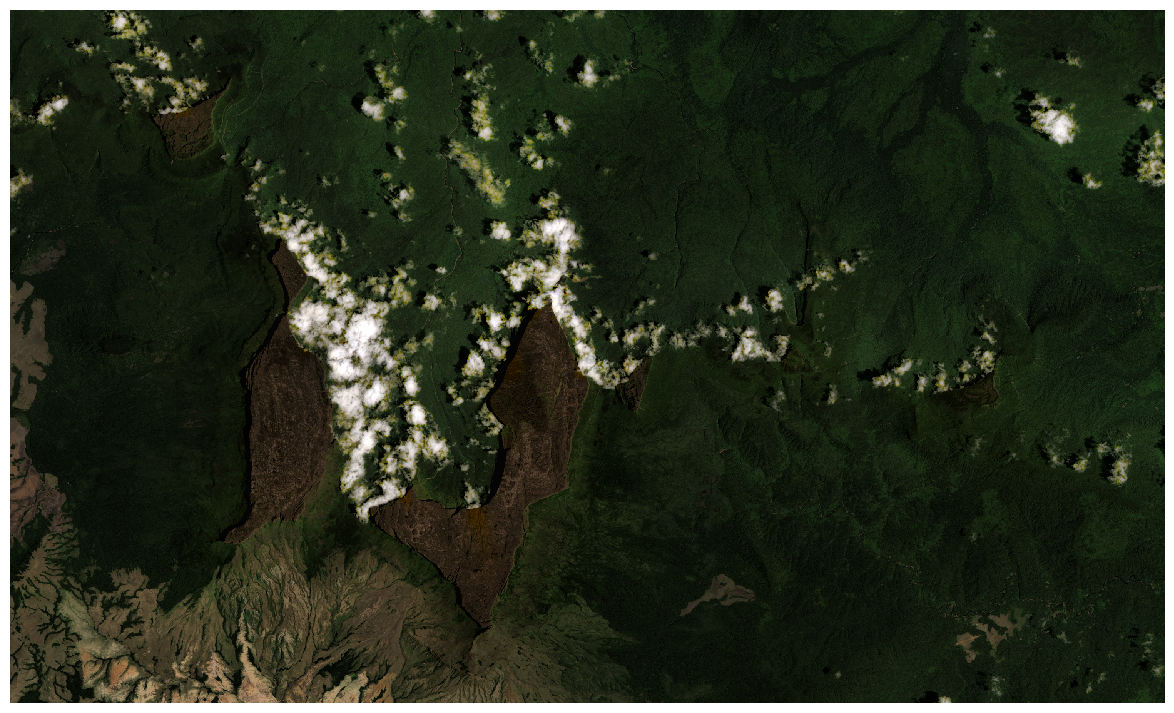

In [4]:
rgb = xls.composite(scene, rescale_to=(0.03, 0.6))
rgb = xls.equalize_histogram(rgb, clip_limit=0.02, kernel_size=200)

plt.figure(figsize=(16, 9))
rgb.plot.imshow()
plt.axis("scaled")
plt.axis("off")
plt.show()

## Make the wallpaper

Now we can save it in both 4k and 720p resolution, making sure that the dimensions are exactly 16:9.

In [5]:
image4k, image720p = wallpaper.save(rgb, folder="../wallpapers/", prefix="roraima")

Plot them both to make sure they look OK.

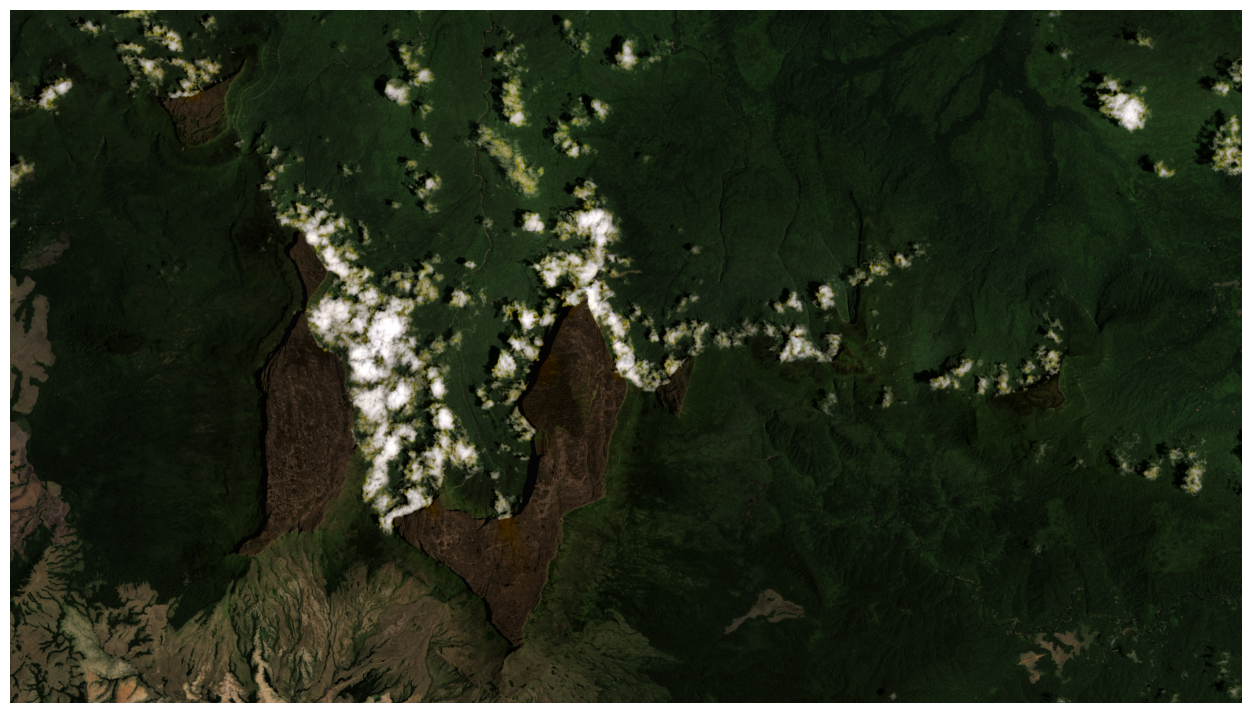

In [6]:
plt.figure(figsize=(16, 9))
plt.imshow(image4k)
plt.axis("scaled")
plt.axis("off")
plt.show()

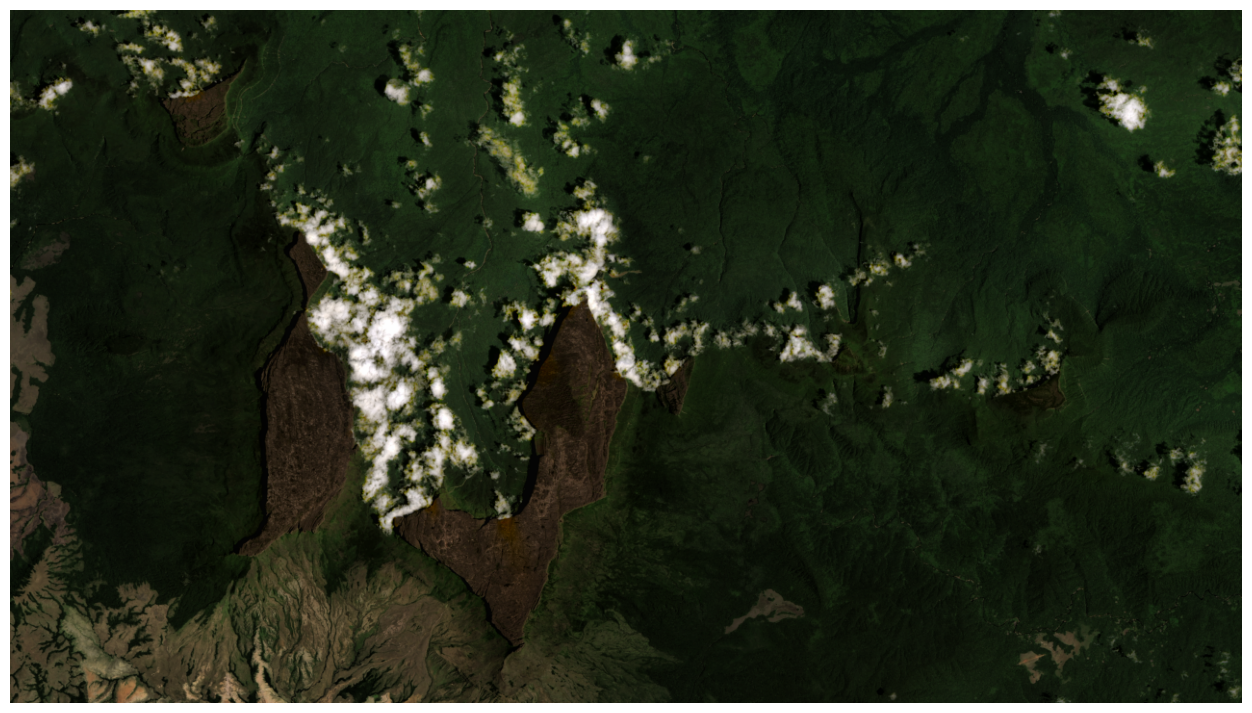

In [7]:
plt.figure(figsize=(16, 9))
plt.imshow(image720p)
plt.axis("scaled")
plt.axis("off")
plt.show()